In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
image_size = 256
batch_size = 32
channel = 3

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
"MergedDataset",
shuffle = True,
image_size=(image_size,image_size),
batch_size=batch_size)

Found 720 files belonging to 2 classes.


In [4]:
class_names = dataset.class_names
class_names

['Forge', 'Real']

In [5]:
len(dataset)

23

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0]


In [7]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]], shape=(256, 256, 3), dtype=float32)


In [8]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


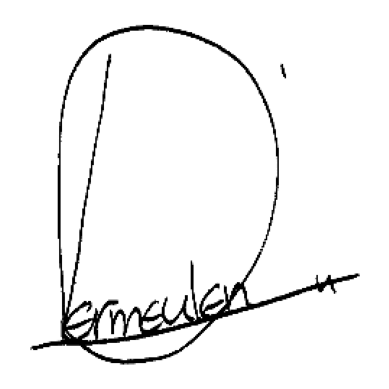

In [9]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.axis('off')

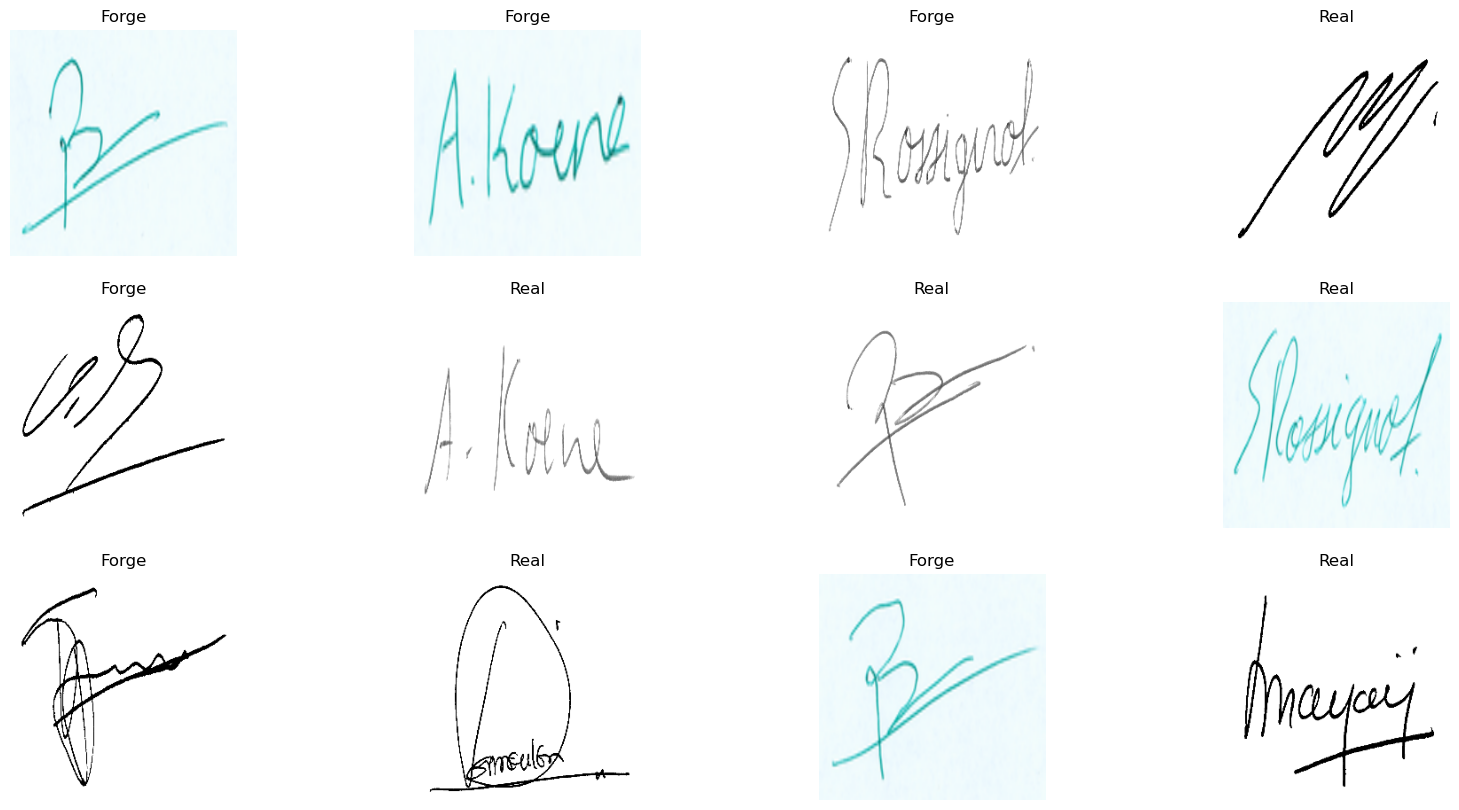

In [15]:
plt.figure(figsize=(20,10))
for image_batch, label_batch in dataset.take(1):  # Take one batch of images
    for i in range(12):  # Display 12 images
        ax = plt.subplot(3, 4, i + 1)  # Create subplot
        plt.imshow(image_batch[i].numpy().astype('uint8'))  # Display image
        plt.title(class_names[label_batch[i]])  # Title based on label
        plt.axis('off')  # Turn off axes



In [16]:
len(dataset)

23

In [17]:
train_size = 0.8
len(dataset)*train_size

18.400000000000002

In [18]:
def getdataset_partition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [19]:
train_ds,val_ds,test_ds=getdataset_partition(dataset)


In [20]:
len(train_ds)

18

In [21]:
len(val_ds)

2

In [22]:
len(test_ds)

3

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [26]:
resize_rescale=tf.keras.Sequential([
    layers.Resizing(image_size,image_size),
    layers.Rescaling(1/0.255)
])

In [27]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.1)
])

In [33]:
from tensorflow.keras.models import Sequential
Channel = 3
input_shape = (image_size,image_size,Channel)
n_classes = 2
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

In [34]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy']
)

In [35]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896,258 (3.42 MB)

 Trainable params: 896,258 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.save('crnn_signature_verification_model.keras')

In [37]:
history = model.fit(
train_ds,
epochs=50,
batch_size=batch_size,
verbose=1,
validation_data=val_ds
)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 766ms/step - accuracy: 0.4874 - loss: 306.3574 - val_accuracy: 0.4688 - val_loss: 1.0057
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 899ms/step - accuracy: 0.4754 - loss: 0.8237 - val_accuracy: 0.5156 - val_loss: 0.6959
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5233 - loss: 0.6929 - val_accuracy: 0.5156 - val_loss: 0.6943
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 919ms/step - accuracy: 0.4177 - loss: 0.6938 - val_accuracy: 0.5000 - val_loss: 0.6941
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 909ms/step - accuracy: 0.4687 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6940
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 951ms/step - accuracy: 0.4510 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6940
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 954ms/step - accuracy: 0.4974 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6939
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 905ms/step - accuracy: 0.4954 - loss: 0.6931 - val_accur

In [38]:
scores = model.evaluate(test_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - accuracy: 0.5641 - loss: 0.6765


In [39]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 18}

In [40]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [41]:
history.history['accuracy']

[0.4982142746448517,
 0.4803571403026581,
 0.5089285969734192,
 0.4392857253551483,
 0.5035714507102966,
 0.5053571462631226,
 0.5053571462631226,
 0.5071428418159485,
 0.5035714507102966,
 0.5053571462631226,
 0.5035714507102966,
 0.5053571462631226,
 0.5053571462631226,
 0.5017856955528259,
 0.5071428418159485,
 0.5053571462631226,
 0.5142857432365417,
 0.5053571462631226,
 0.5089285969734192,
 0.512499988079071,
 0.512499988079071,
 0.5321428775787354,
 0.5267857313156128,
 0.512499988079071,
 0.5285714268684387,
 0.5071428418159485,
 0.5053571462631226,
 0.5053571462631226,
 0.5035714507102966,
 0.5071428418159485,
 0.5107142925262451,
 0.5357142686843872,
 0.5214285850524902,
 0.5357142686843872,
 0.512499988079071,
 0.5178571343421936,
 0.5214285850524902,
 0.5053571462631226,
 0.5035714507102966,
 0.5053571462631226,
 0.5053571462631226,
 0.5035714507102966,
 0.5035714507102966,
 0.5035714507102966,
 0.5053571462631226,
 0.5053571462631226,
 0.5071428418159485,
 0.50535714626312

In [42]:
acc_his = history.history['accuracy']
val_acc_his = history.history['val_accuracy']
loss_his = history.history['loss']
val_loss_his = history.history['val_loss']

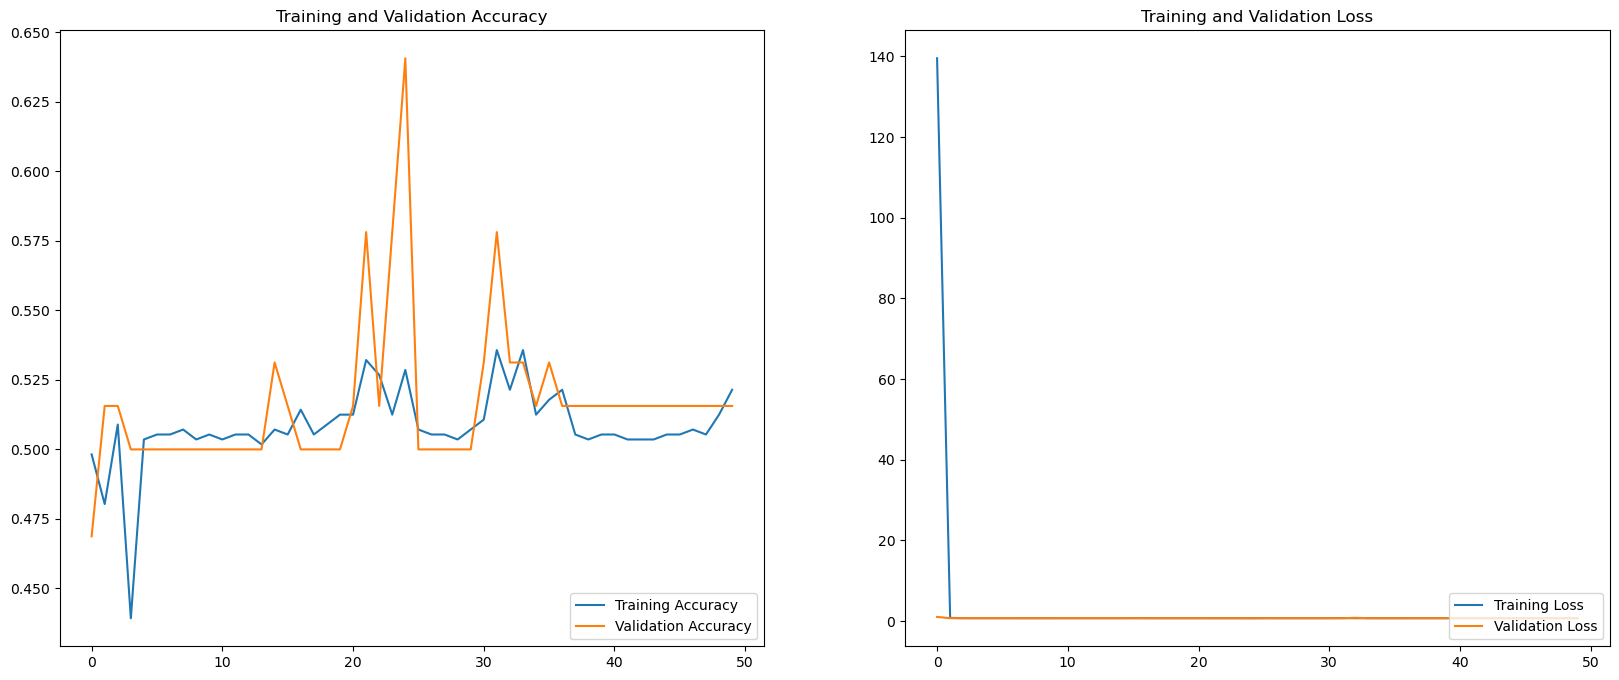

In [43]:
plt.figure(figsize=(20,8))
ax = plt.subplot(1,2,1)
plt.plot(range(50),acc_his,label='Training Accuracy')
plt.plot(range(50),val_acc_his,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
ax = plt.subplot(1,2,2)
plt.plot(range(50),loss_his,label='Training Loss')
plt.plot(range(50),val_loss_his,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()


First image to predict
Actual label: Real
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predicted label: Real


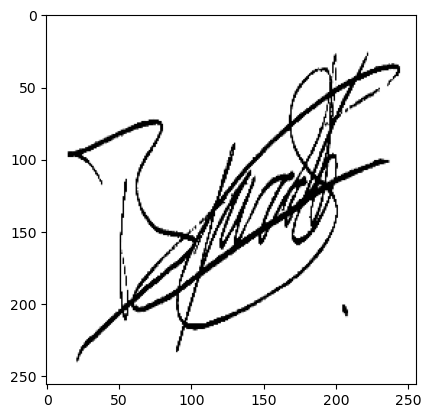

In [44]:
import numpy as np
for image_batch,label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    print('First image to predict')
    plt.imshow(first_image)
    print('Actual label:',class_names[first_label])
    batch_predictions=model.predict(image_batch)
    print('predicted label:',class_names[np.argmax(batch_predictions[0])])

In [53]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)  # Use 'img' instead of 'images[i]'
    img_array = tf.expand_dims(img_array, 0)  # Expand dimensions to match model input
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]  # Use [] instead of ()
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


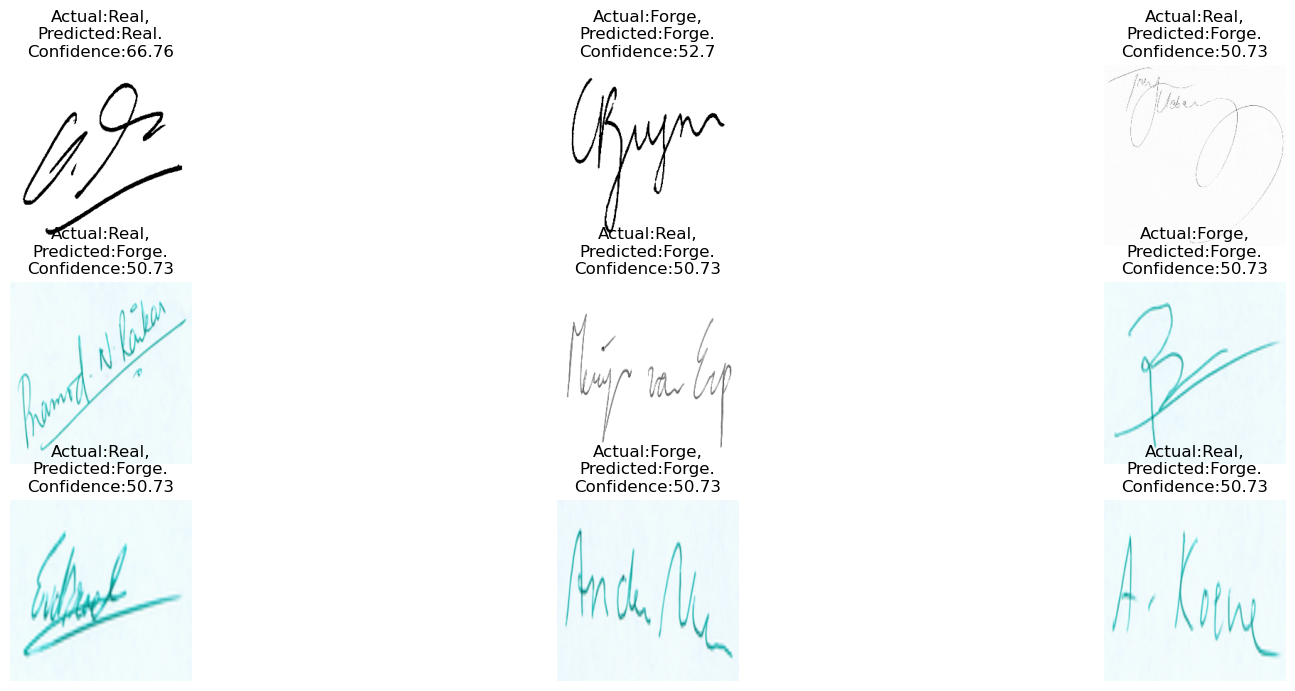

In [54]:
plt.figure(figsize=(20,8))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence= predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f'Actual:{actual_class},\nPredicted:{predicted_class}.\nConfidence:{confidence}')
        plt.axis('off')

In [56]:
final_loss,final_accuracy=model.evaluate(test_ds)
print('Final loss:{:.2f}%'.format(final_loss*100))
print('Final Accuracy:{:.2f}%'.format(final_accuracy*100))


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 738ms/step - accuracy: 0.5302 - loss: 0.6643
Final loss:67.37%
Final Accuracy:55.00%
